In [1]:
# 1. CRAWL NAME, BIO AND DISCUSSION - DONE
# 2. DETERMINE THE GENDER - DONE
# 3. DETERMINE THE SENTIMENT - DONE
# 4. VISUALIZATION 
try:
    import nltk
except ModuleNotFoundError:
    !pip install nltk --user
nltk.download('punkt')
from requests import get
try:
    from bs4 import BeautifulSoup
except ModuleNotFoundError:
    !pip install BeautifulSoup --user 
try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
except ModuleNotFoundError:
    ! pip install vaderSentiment --user
import string 
try:
    import pandas as pd
except ModuleNotFoundError:
    ! pip install pandas --user
import string
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yunihafsari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# GETTING THE NAMES

names=[]
temporary_names=[]

main_url = 'https://en.wikipedia.org/wiki/Category:AfD_debates_(Biographical)'
name_response = get(main_url)
parsed_name = BeautifulSoup(name_response.text,'html.parser')
biographies = parsed_name.find_all('div',class_='mw-category-group')
for biography in biographies:
    biography = biography.find_all('li')
    for name in biography:
        name = name.a.text.split('/')
        names.append(name[1])
        
# for faster testing purpose, we request only few pages for now to the server
for i in range(1,50):
    temporary_names.append(names[i])
    
names
print(len(names))

179


In [8]:
# ADDING THE NAME FROM OLD DISCUSSION 

# filter only the old discussion 
# filter only the non deleted articles 
main_url_old = 'https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Old/Open_AfDs'
main_response = get(main_url_old)
html_soup = BeautifulSoup(main_response.text,'html.parser')
old_discussions = html_soup.find_all('span',class_='toctext')
urls=[]
for old_discussion in old_discussions:
    date = old_discussion.text
    date = date.replace(' ','_')
    print(date)
    url = 'https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Log/'+date
    response = get(url)
    html_soup = BeautifulSoup(response.text,'html.parser')
    contents = html_soup.find_all('li',class_='toclevel-1')  
    for content in contents:
        non_deleted_content = content.find('span',class_='toctext').text
        non_deleted_content = non_deleted_content.replace(' ','_')
        exist_url = 'https://en.wikipedia.org/wiki/'+non_deleted_content
        exist_url_response = get(exist_url)
        if exist_url_response.status_code==200:
            urls.append(exist_url)

            
# filter only biography
person_urls=[]
for i in range(len(urls)):
    print(urls[i])
    response = get(urls[i])
    html_soup = BeautifulSoup(response.text,'html.parser')
    categories_main = html_soup.find('div',class_='mw-normal-catlinks')
    if categories_main is not None:
        categories = categories_main.find_all('li')
        if len(categories)<=1:
            person_category = categories[0].a['title']
            if person_category =='Category:Living people':
                person_urls.append(urls[i])
        else:
            for category in categories:
                person_category = category.a['title']
                if person_category =='Category:Living people':
                    person_urls.append(urls[i])
            

for old_name in person_urls:
    old_names = old_name.split('/')
    names.append(old_names[4])
    
names
print(len(names))

179


In [9]:
# GETTING THE BIO

wikipedia_bio={}
not_deleted_name=[]

for name in names:
    name = name.replace(" ", "_")
    url = 'https://en.wikipedia.org/wiki/'+name
    response = get(url)
    page = BeautifulSoup(response.text, 'html.parser')
    
    if response.status_code == 200:
        not_deleted_name.append(name)
        bio_data = page.find('div', class_='mw-parser-output')
        bio_data = bio_data.find_all('p')
        print(url)
        print(name)
        
        if(len(bio_data)>2):
            datas=[]
            for i in range(1,len(bio_data)):
                bio = bio_data[i].text
                bio = bio.replace('\n',' ')
                datas.append(bio)
            
            datas2 = ' '.join(datas)
            wikipedia_bio[name]=datas2
            
        else:
            bio = bio_data[0].text
            wikipedia_bio[name]=bio
            
print(not_deleted_name)
test_df = pd.DataFrame(list(wikipedia_bio.items()),columns=['name','bio'])
test_df

https://en.wikipedia.org/wiki/Adam_Idah
Adam_Idah
https://en.wikipedia.org/wiki/Ahmed_al-Gizawi
Ahmed_al-Gizawi
https://en.wikipedia.org/wiki/Ajeesh_Dasan
Ajeesh_Dasan
https://en.wikipedia.org/wiki/Akhilendra_Sahu
Akhilendra_Sahu
https://en.wikipedia.org/wiki/Aldo_Ghiozzi
Aldo_Ghiozzi
https://en.wikipedia.org/wiki/Alice_Little
Alice_Little
https://en.wikipedia.org/wiki/Alizeh_Shah
Alizeh_Shah
https://en.wikipedia.org/wiki/Allison_Raskin
Allison_Raskin
https://en.wikipedia.org/wiki/Alois_Buttinger
Alois_Buttinger
https://en.wikipedia.org/wiki/Alyssa_Quilala
Alyssa_Quilala
https://en.wikipedia.org/wiki/Amir_Siddique
Amir_Siddique
https://en.wikipedia.org/wiki/Amitov_Teja
Amitov_Teja
https://en.wikipedia.org/wiki/Amr_Awadallah
Amr_Awadallah
https://en.wikipedia.org/wiki/Anand_Mishra
Anand_Mishra
https://en.wikipedia.org/wiki/Anna_Ben
Anna_Ben
https://en.wikipedia.org/wiki/Anne_Darquier
Anne_Darquier
https://en.wikipedia.org/wiki/Anthony_Mills_(American_Management_Consultant)
Anthony_Mills

https://en.wikipedia.org/wiki/Shahram_Jafarinejad
Shahram_Jafarinejad
https://en.wikipedia.org/wiki/Sheikh_Bin_Faisal_bin_Khaled_Al_Qassimi
Sheikh_Bin_Faisal_bin_Khaled_Al_Qassimi
https://en.wikipedia.org/wiki/Siarhiej_Stasievich
Siarhiej_Stasievich
https://en.wikipedia.org/wiki/Sigríður_Þorgeirsdóttir
Sigríður_Þorgeirsdóttir
https://en.wikipedia.org/wiki/Sijo_Vadakkan
Sijo_Vadakkan
https://en.wikipedia.org/wiki/Stanley_G._Ellis
Stanley_G._Ellis
https://en.wikipedia.org/wiki/Stephanie_Leigh_Schlund
Stephanie_Leigh_Schlund
https://en.wikipedia.org/wiki/Sweet_Baby_J'ai
Sweet_Baby_J'ai
https://en.wikipedia.org/wiki/Tatiana_Zavialova
Tatiana_Zavialova
https://en.wikipedia.org/wiki/Teddi_Gold
Teddi_Gold
https://en.wikipedia.org/wiki/Teena_Singh
Teena_Singh
https://en.wikipedia.org/wiki/Teresa_Kruze
Teresa_Kruze
https://en.wikipedia.org/wiki/The_Mind_Tree
The_Mind_Tree
https://en.wikipedia.org/wiki/Thorsteinn_Thorgeirsson
Thorsteinn_Thorgeirsson
https://en.wikipedia.org/wiki/Tom_Kratman
Tom_

,name,bio
0,Adam_Idah,Adam Uche Idah (born 11 February 2001) is an I...
1,Ahmed_al-Gizawi,"On 17 April 2012, al-Gizawi was detained short..."
2,Ajeesh_Dasan,\n
3,Akhilendra_Sahu,Akhilendra Sahu (born 1 February 2001)[citatio...
4,Aldo_Ghiozzi,Aldo Ghiozzi is a game wholesaler who has work...
5,Alice_Little,After first being invited out to the ranch by ...
6,Alizeh_Shah,
7,Allison_Raskin,"Raskin has written for Elle, NBC News Think, a..."
8,Alois_Buttinger,"In February 1934, he was director of the Sonn..."
9,Alyssa_Quilala,Quilala has toured the country[which?] and par...


In [10]:
# DETERMINE THE GENDER
import string
import re

maleVocabulary = ["actor", "air steward", "barman", "boy", "boy scout", "bridegroom", "bus conductor", "chairman", "gentleman",
                 "headmaster", "hero", "host", "king", "landlord", "lord", "wife", "man", "monk", "prince", "steward", 
                 "waiter", "widower", "father", "grandfather", "son", "brother", "uncle", "nephew", "prince", "he", "him",
                 "businessman", "his", "prince", "king"]

femaleVocabulary = ["actress", "air stewardess", "barmaid", "girl", "girl guide", "bride", "bus conductress", "chairwoman", 
                   "lady", "headmistress", "heroine", "hostess", "queen", "landlady", "lady", "woman", "nun", "princess",
                   "stewardess", "waitress", "widow", "mother", "grandmother", "daughter", "sister", "aunt", "niece", "she", "her",
                   "housewife", "princess", "queen", "husband"]

def determine_the_gender(sentence):
    
    # text preprocess 
    lower_case = sentence.lower()
    remove_number = re.sub(r'\d+','',lower_case)
    remove_punc = str.maketrans({key: None for key in string.punctuation})
    cleaned_text = remove_number.translate(remove_punc) 
    
    tokens = nltk.word_tokenize(cleaned_text)
    
    if(len(tokens) > 0):
        maleVFreq = []
        maleWordCount = 0

        for w in maleVocabulary:
            wCount = tokens.count(w)
            maleWordCount += wCount
            maleVFreq.append({w : wCount})

        femaleVFreq = []
        femaleWordCount = 0

        for w in femaleVocabulary:
            wCount = tokens.count(w)
            femaleWordCount += wCount
            femaleVFreq.append({w : wCount})

        gender = ""
        if(maleWordCount > femaleWordCount):
            gender = "male"
        elif(femaleWordCount > maleWordCount):
            gender = "female"
        else :
            gender = "N/A"
            
        return gender

test_df['gender']= test_df['bio'].apply(determine_the_gender)
test_df

,name,bio,gender
0,Adam_Idah,Adam Uche Idah (born 11 February 2001) is an I...,N/A
1,Ahmed_al-Gizawi,"On 17 April 2012, al-Gizawi was detained short...",male
2,Ajeesh_Dasan,\n,None
3,Akhilendra_Sahu,Akhilendra Sahu (born 1 February 2001)[citatio...,male
4,Aldo_Ghiozzi,Aldo Ghiozzi is a game wholesaler who has work...,male
5,Alice_Little,After first being invited out to the ranch by ...,female
6,Alizeh_Shah,,None
7,Allison_Raskin,"Raskin has written for Elle, NBC News Think, a...",female
8,Alois_Buttinger,"In February 1934, he was director of the Sonn...",male
9,Alyssa_Quilala,Quilala has toured the country[which?] and par...,N/A


In [11]:
# GETTING THE DISCUSSION. 

def clean_text(sentence):
    lower_case = sentence.lower()
    remove_number = re.sub(r'\d+','',lower_case)
    remove_punc = str.maketrans({key: None for key in string.punctuation})
    cleaned_text = remove_number.translate(remove_punc) 
    return cleaned_text


def grab_the_discussion(name):
    url = 'https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/'+name
    print(url)
    response = get(url)
    page = BeautifulSoup(response.text, 'html.parser')
    data_content = page.find('div', class_='mw-parser-output')
    if data_content is not None:
        datas = data_content.find_all('li')
        crawled_discussion=[]
        for data in datas[3:]:
            final_data = data.get_text()
            final_data = final_data.split('.')
            del final_data[-1]
            cleaned_data = ' '.join(final_data)
            cleaned_data = clean_text(cleaned_data)
            crawled_discussion.append(cleaned_data)
        
        if len(crawled_discussion) <= 3:
            data = data_content.find('p').get_text()
            data = clean_text(data)
            crawled_discussion.append(data)

        return crawled_discussion

test_df['discussion'] = test_df['name'].apply(grab_the_discussion)
test_df

https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Adam_Idah
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Ahmed_al-Gizawi
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Ajeesh_Dasan
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Akhilendra_Sahu
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Aldo_Ghiozzi
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Alice_Little
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Alizeh_Shah
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Allison_Raskin
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Alois_Buttinger
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Alyssa_Quilala
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Amir_Siddique
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Amitov_Teja
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Amr_Awadallah
https://en.wiki

https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Nadia_Ravita
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Natasha_(entertainer)
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Nathalie_Gagné
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Nick_Hissom
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Nicolas_Simoes
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Nik_Halik
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Nina_Ivanišin
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Nitanshi_Goel
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Norman_Ali_Khalaf
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/NyeinChanKoKo
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/O._Leslie_Stone
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion/Pablo_Hernán_Gómez_(midfielder)
https://en.wikipedia.org/wiki/Wikipedia:Articles_for_deletion

,name,bio,gender,discussion
0,Adam_Idah,Adam Uche Idah (born 11 February 2001) is an I...,N/A,[delete per nom fails wpgng and wpnfootball n...
1,Ahmed_al-Gizawi,"On 17 April 2012, al-Gizawi was detained short...",male,[per wpblpe this person is not activist he is ...
2,Ajeesh_Dasan,\n,None,"[, comment i will get the source have more ref..."
3,Akhilendra_Sahu,Akhilendra Sahu (born 1 February 2001)[citatio...,male,[delete total garbage for wikipedia at the mom...
4,Aldo_Ghiozzi,Aldo Ghiozzi is a game wholesaler who has work...,male,[keep if more sources can be found otherwise m...
5,Alice_Little,After first being invited out to the ranch by ...,female,[delete per nom also reads like an advertisem...
6,Alizeh_Shah,,None,[keep appears to pass wpnactor on the televis...
7,Allison_Raskin,"Raskin has written for Elle, NBC News Think, a...",female,"[keep, keep – i agree with peterx, no reliable..."
8,Alois_Buttinger,"In February 1934, he was director of the Sonn...",male,[comment possibly notable not all sources for ...
9,Alyssa_Quilala,Quilala has toured the country[which?] and par...,N/A,[delete the one role actually done isnt signi...


In [16]:
# new crawling result 

#test_df.to_csv(r'"/Users/yunihafsari/Desktop/Css/new_discussion.csv')
df_copy = test_df

In [17]:
# DETERMINE THE SENTIMENT 

from textblob import TextBlob

analyzer = SentimentIntensityAnalyzer()

def determine_the_sentiment(sentences):
    if (sentences != None):
        posCount = 0
        negCount = 0
        for sentence in sentences:
            # analysis 
            analisis = analyzer.polarity_scores(sentence)
            analysis_blob = TextBlob(sentence)
            result=''
            if analisis['compound'] > 0:
                posCount = posCount + 1
            elif analisis['compound'] <= 0:
                negCount = negCount + 1
                
        if(posCount > negCount):
            result = 'positive'
        elif(negCount > posCount):
            result = 'negative'
    else:
        result = 'n/a'

          
    return result

test_df['sentiment']= test_df['discussion'].apply(determine_the_sentiment)
test_df

,name,bio,gender,discussion,sentiment
0,Adam_Idah,Adam Uche Idah (born 11 February 2001) is an I...,N/A,[delete per nom fails wpgng and wpnfootball n...,positive
1,Ahmed_al-Gizawi,"On 17 April 2012, al-Gizawi was detained short...",male,[per wpblpe this person is not activist he is ...,negative
2,Ajeesh_Dasan,\n,None,"[, comment i will get the source have more ref...",positive
3,Akhilendra_Sahu,Akhilendra Sahu (born 1 February 2001)[citatio...,male,[delete total garbage for wikipedia at the mom...,negative
4,Aldo_Ghiozzi,Aldo Ghiozzi is a game wholesaler who has work...,male,[keep if more sources can be found otherwise m...,negative
5,Alice_Little,After first being invited out to the ranch by ...,female,[delete per nom also reads like an advertisem...,negative
6,Alizeh_Shah,,None,[keep appears to pass wpnactor on the televis...,
7,Allison_Raskin,"Raskin has written for Elle, NBC News Think, a...",female,"[keep, keep – i agree with peterx, no reliable...",negative
8,Alois_Buttinger,"In February 1934, he was director of the Sonn...",male,[comment possibly notable not all sources for ...,negative
9,Alyssa_Quilala,Quilala has toured the country[which?] and par...,N/A,[delete the one role actually done isnt signi...,positive


In [19]:
# GETTING THE DATE 

from datetime import datetime 

def get_article_date(name):
    date_url = 'https://en.wikipedia.org/w/index.php?title='+name+'&action=info'
    print(date_url)
    date_response = get(date_url)
    html_date = BeautifulSoup(date_response.text,'html.parser')
    dates = html_date.find('tr',{'id':'mw-pageinfo-lasttime'})
    article_date=''
    if dates is not None: 
        dates = dates.find_all('td')[1]
        dates = dates.a.get_text().split(',')[1]
        dates = dates.replace(' ','-')
        article_date = datetime.strptime(dates, '-%d-%B-%Y')
        
    return article_date
    
test_df['date']= test_df['name'].apply(get_article_date)
male = len(test_df.loc[test_df['gender'] == 'male'])
female =len(test_df.loc[test_df['gender'] == 'female'])
no_gender=len(test_df.loc[test_df['gender'] == 'N/A'])
total = len(not_deleted_name)
print('male',male)
print('female',female)
print('no gender',no_gender)
print('total',total)
test_df

https://en.wikipedia.org/w/index.php?title=Adam_Idah&action=info
https://en.wikipedia.org/w/index.php?title=Ahmed_al-Gizawi&action=info
https://en.wikipedia.org/w/index.php?title=Ajeesh_Dasan&action=info
https://en.wikipedia.org/w/index.php?title=Akhilendra_Sahu&action=info
https://en.wikipedia.org/w/index.php?title=Aldo_Ghiozzi&action=info
https://en.wikipedia.org/w/index.php?title=Alice_Little&action=info
https://en.wikipedia.org/w/index.php?title=Alizeh_Shah&action=info
https://en.wikipedia.org/w/index.php?title=Allison_Raskin&action=info
https://en.wikipedia.org/w/index.php?title=Alois_Buttinger&action=info
https://en.wikipedia.org/w/index.php?title=Alyssa_Quilala&action=info
https://en.wikipedia.org/w/index.php?title=Amir_Siddique&action=info
https://en.wikipedia.org/w/index.php?title=Amitov_Teja&action=info
https://en.wikipedia.org/w/index.php?title=Amr_Awadallah&action=info
https://en.wikipedia.org/w/index.php?title=Anand_Mishra&action=info
https://en.wikipedia.org/w/index.php?t

https://en.wikipedia.org/w/index.php?title=Pablo_Hernán_Gómez_(midfielder)&action=info
https://en.wikipedia.org/w/index.php?title=Patrick_Boyd&action=info
https://en.wikipedia.org/w/index.php?title=Patrick_Sweeney_(soccer)&action=info
https://en.wikipedia.org/w/index.php?title=Paweł_Urban&action=info
https://en.wikipedia.org/w/index.php?title=Pero_Ljubic&action=info
https://en.wikipedia.org/w/index.php?title=Pornsak_Songsaeng&action=info
https://en.wikipedia.org/w/index.php?title=Presley_Lawson&action=info
https://en.wikipedia.org/w/index.php?title=Qais_Qandil&action=info
https://en.wikipedia.org/w/index.php?title=Rajesh_Khanna_MD&action=info
https://en.wikipedia.org/w/index.php?title=Raymond_Cilliers&action=info
https://en.wikipedia.org/w/index.php?title=Richard_Rappaport&action=info
https://en.wikipedia.org/w/index.php?title=Samantha_Cerio&action=info
https://en.wikipedia.org/w/index.php?title=Sarah_Hoyt&action=info
https://en.wikipedia.org/w/index.php?title=Saranga_Shrestha&action=i

,name,bio,gender,discussion,sentiment,date
0,Adam_Idah,Adam Uche Idah (born 11 February 2001) is an I...,N/A,[delete per nom fails wpgng and wpnfootball n...,positive,2019-07-20
1,Ahmed_al-Gizawi,"On 17 April 2012, al-Gizawi was detained short...",male,[per wpblpe this person is not activist he is ...,negative,2019-07-23
2,Ajeesh_Dasan,\n,None,"[, comment i will get the source have more ref...",positive,2019-07-19
3,Akhilendra_Sahu,Akhilendra Sahu (born 1 February 2001)[citatio...,male,[delete total garbage for wikipedia at the mom...,negative,2019-07-22
4,Aldo_Ghiozzi,Aldo Ghiozzi is a game wholesaler who has work...,male,[keep if more sources can be found otherwise m...,negative,2019-07-22
5,Alice_Little,After first being invited out to the ranch by ...,female,[delete per nom also reads like an advertisem...,negative,2019-07-22
6,Alizeh_Shah,,None,[keep appears to pass wpnactor on the televis...,,2019-07-22
7,Allison_Raskin,"Raskin has written for Elle, NBC News Think, a...",female,"[keep, keep – i agree with peterx, no reliable...",negative,2019-07-21
8,Alois_Buttinger,"In February 1934, he was director of the Sonn...",male,[comment possibly notable not all sources for ...,negative,2019-07-22
9,Alyssa_Quilala,Quilala has toured the country[which?] and par...,N/A,[delete the one role actually done isnt signi...,positive,2019-07-22


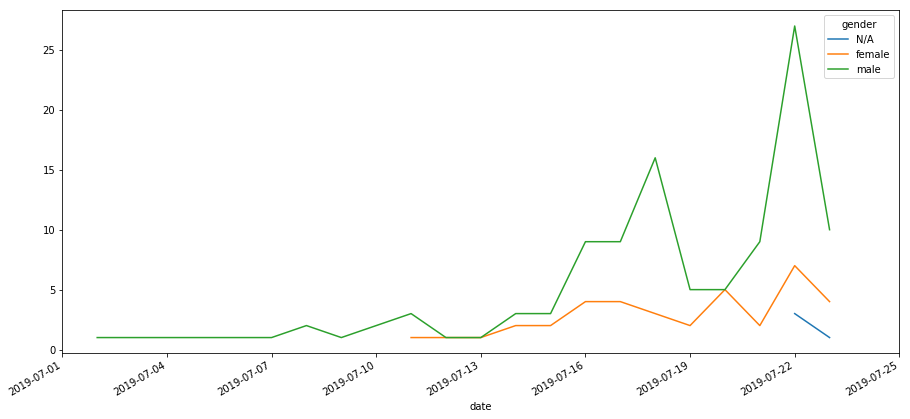

In [22]:
import matplotlib.pyplot as plt
import datetime

fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlim([datetime.date(2019,7,1), datetime.date(2019,7,25)])
test_df.groupby(['date','gender']).count()['name'].unstack().plot(ax=ax)


In [10]:
df_male = (test_df[test_df['gender'] == 'male']).head(40)
df_female = (test_df[test_df['gender'] == 'female']).head(40)
frames = [df_male, df_female]
df = pd.concat(frames)

Text(0, 0.5, 'Number of documents')

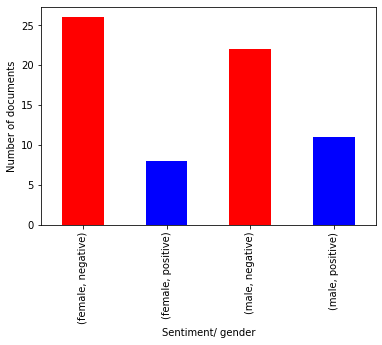

In [16]:
df = df[df.sentiment != 'n/a']
df = df[df.sentiment != '']
grouped_df = df.groupby(["gender", "sentiment"]).size()
g = grouped_df.plot(kind="bar", x='gender',y='size', color=['r', 'b'])
g.set_xlabel("Sentiment/ gender")
g.set_ylabel("Number of documents")

In [17]:
test_df.to_csv(r'/home/manendra/Desktop/CSS/crawl_result.csv')